# How to Load Nanodet in PyTorch

This article is an introductory tutorial to infer nanodet with PyTorch.

**Note**, we suppose this notebook is in the root directory of nonadet!

## Install nanodet first

For us to begin with, PyTorch should be installed. TorchVision is also required since we will be using it as our model zoo.

A quick solution is to install via pip

```shell
pip install torch==1.7.1
pip install torchvision==0.8.2
```

or please refer to official site https://pytorch.org/get-started/locally/

PyTorch versions should be backwards compatible but should be used with the proper TorchVision version.

And then don't forget to install other dependencies.

```shell
pip install -r requirements.txt
```

Next enter the key part, let's install `nanodet`!

```shell
python setup.py develop
```

## Set Environmental Parameters

In [10]:
import os
import cv2
import torch

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cpu')

In [2]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

## Set Model Configuration and Logger

In [3]:
from nanodet.util import cfg, load_config, Logger

In [8]:
config_path = 'C:/Github/nanodet/config/nanodet-plus-m_416.yml'
model_path = 'C:/Github/nanodet/nanodet-plus-m_416_checkpoint.ckpt'
image_path = 'C:/Github/nanodet/demo_mnn/imgs/000252.jpg'

In [5]:
load_config(cfg, config_path)
logger = Logger(-1, use_tensorboard=False)

## Set Model Predictor

In [6]:
from demo.demo import Predictor

In [11]:
predictor = Predictor(cfg, model_path, logger, device=device)

model size is  1.0x
init weights...
=> loading pretrained model https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth
Finish initialize NanoDet-Plus Head.


In [12]:
meta, res = predictor.inference(image_path)

forward time: 0.294s | decode time: 0.086s | 

c:\Users\franc\anaconda3\envs\nanodet\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## Detection output visualisation

In [13]:
from nanodet.util import overlay_bbox_cv

from IPython.display import display
from PIL import Image

def cv2_imshow(a, convert_bgr_to_rgb=True):
    """A replacement for cv2.imshow() for use in Jupyter notebooks.
    Args:
        a: np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
        convert_bgr_to_rgb: switch to convert BGR to RGB channel.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if convert_bgr_to_rgb and a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

In [14]:
result = overlay_bbox_cv(meta['raw_img'][0], res[0], cfg.class_names, score_thresh=0.35)

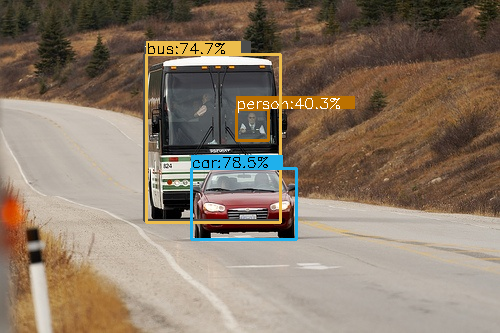

In [15]:
imshow_scale = 1.0
cv2_imshow(cv2.resize(result, None, fx=imshow_scale, fy=imshow_scale))